# 1. Loading and reading of the dataset 

In [1]:
#downloaded the dataset from the UCI repository archive 
#(https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

#decompressed the RAR file 
#turned the arff file into csv (using Python converter)

# now loading full csv into the notebook

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Chronic_Kidney_Disease/chronic_kidney_disease_full.csv', header = 0, on_bad_lines='skip')

#there are only 25 features so no need to load only a subset of the features and no need to use chunksize

In [3]:
data.columns

Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

# 2. Exploring, handling missing data and preprocessing

In [4]:
data.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   'age'    397 non-null    object
 1   'bp'     397 non-null    object
 2   'sg'     397 non-null    object
 3   'al'     397 non-null    object
 4   'su'     397 non-null    object
 5   'rbc'    397 non-null    object
 6   'pc'     397 non-null    object
 7   'pcc'    397 non-null    object
 8   'ba'     397 non-null    object
 9   'bgr'    397 non-null    object
 10  'bu'     397 non-null    object
 11  'sc'     397 non-null    object
 12  'sod'    397 non-null    object
 13  'pot'    397 non-null    object
 14  'hemo'   397 non-null    object
 15  'pcv'    397 non-null    object
 16  'wbcc'   397 non-null    object
 17  'rbcc'   397 non-null    object
 18  'htn'    397 non-null    object
 19  'dm'     397 non-null    object
 20  'cad'    397 non-null    object
 21  'appet'  397 non-null    object
 22  'p

In [6]:
#the dataset is about chronic kidney disease

#we are trying to model whether or not somebody has a chronic kidney disease ("class")

#starting from a dataset of 397 individuals 
#with 25 features recorded 
#out of which 11 are numerical and 14 nominal 


#The variables range from 

#1.Age(numerical)
#age in years
#2.Blood Pressure(numerical)
#bp in mm/Hg
#3.Specific Gravity(nominal)
#sg - (1.005,1.010,1.015,1.020,1.025)
#4.Albumin(nominal)
#al - (0,1,2,3,4,5)
#5.Sugar(nominal)
#su - (0,1,2,3,4,5)
#6.Red Blood Cells(nominal)
#rbc - (normal,abnormal)
#7.Pus Cell (nominal)
#pc - (normal,abnormal)
#8.Pus Cell clumps(nominal)
#pcc - (present,notpresent)
#9.Bacteria(nominal)
#ba - (present,notpresent)
#10.Blood Glucose Random(numerical)
#bgr in mgs/dl
#11.Blood Urea(numerical)
#bu in mgs/dl
#12.Serum Creatinine(numerical)
#sc in mgs/dl
#13.Sodium(numerical)
#sod in mEq/L
#14.Potassium(numerical)
#pot in mEq/L
#15.Hemoglobin(numerical)
#hemo in gms
#16.Packed Cell Volume(numerical)
#17.White Blood Cell Count(numerical)
#wc in cells/cumm
#18.Red Blood Cell Count(numerical)
#rc in millions/cmm
#19.Hypertension(nominal)
#htn - (yes,no)
#20.Diabetes Mellitus(nominal)
#dm - (yes,no)
#21.Coronary Artery Disease(nominal)
#cad - (yes,no)
#22.Appetite(nominal)
#appet - (good,poor)
#23.Pedal Edema(nominal)
#pe - (yes,no)
#24.Anemia(nominal)
#ane - (yes,no)


In [7]:
data.describe()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
count,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
unique,76,11,6,7,7,3,3,3,3,146,...,45,93,50,3,6,4,3,3,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,105,197,289,200,257,352,371,43,...,69,104,129,249,257,359,314,321,336,246


## 2.1 Cleaning obvious errors

In [8]:
#remove the quotes from the label of the columns                              #DATAFRAME

print("Before is", data.columns.tolist())

data.columns = [col[1:-1] for col in data.columns]

print("\nAfter is", data.columns.tolist())

Before is ["'age'", "'bp'", "'sg'", "'al'", "'su'", "'rbc'", "'pc'", "'pcc'", "'ba'", "'bgr'", "'bu'", "'sc'", "'sod'", "'pot'", "'hemo'", "'pcv'", "'wbcc'", "'rbcc'", "'htn'", "'dm'", "'cad'", "'appet'", "'pe'", "'ane'", "'class'"]

After is ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [9]:
#data['cad'].values 
#ex. PCV 44% means that there are 44 mlliliters of cells in 100 milliliters of blood

In [10]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
unique,76,11,6,7,7,3,3,3,3,146,...,45,93,50,3,6,4,3,3,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,105,197,289,200,257,352,371,43,...,69,104,129,249,257,359,314,321,336,246


In [11]:
#by looking above there is a problem with class because it says unique 3                 #CLASS
#but the classification is binary so should be 2 
print("Class categories are", len(data['class'].unique()), "should be 2 instead")
print("Actual categories for the class variable are", data['class'].unique())

#correct the error
#data.loc[(data['class'] =='ckd\t')]
data['class'].replace({"ckd\t": "ckd"}, inplace=True)
print("Now only", len(data['class'].unique()),"classes")

Class categories are 3 should be 2 instead
Actual categories for the class variable are ['ckd' 'ckd\t' 'notckd']
Now only 2 classes


In [12]:
#by looking above most of the categorical variables are now fixed
#(ie. have 2 values) 
#but for example I see cad (which stands for Coronary Artery Disease 
#so yes/no) with 3 values 
print("cad categories are", len(data['cad'].unique()), "should be 2 instead")
print("currently the categories for this feature are", data['cad'].unique())

#clearly '\tno' is an input error so we correct it for the 2 rows when there is 
#len(data.loc[(data['cad'] =='\tno')])

data['cad'].replace({"\tno": "no"}, inplace=True)
print("Now only", len(data['cad'].unique())-1,"classes") #-1 for the nan

cad categories are 4 should be 2 instead
currently the categories for this feature are ['no' 'yes' '\tno' '?']
Now only 2 classes


In [13]:
#I spot a similar issue with with anemia, pe, appet             #FEATURES
#so there is probably an issue with categorical variables 

ctg_df = data.select_dtypes(include='category') 
#from select_dtypes documentation (#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)
#-> To select strings you must use the object dtype, but note that this will return all object dtype columns
num_df = data.select_dtypes(include='float64') 

#non riconosce i data types perchè li vede tutti direttamente come objects-> andrà sistemato 
dt = data.select_dtypes(include='object') 
dt #-> tutti

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


## 2.2 Missing data

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [14]:
#il problema è che pandas legge 
#tutti i valori delle features come stringhe perchè c'è il "?" nei missing data            #MISSING DATA
#quindi primo step è sostituire il ? con NaN 
#to then work more seamlessly with the datatypes

#guardo dove sta '?'

col_list = data.columns
data.loc[(data[col_list]=='?').any(axis=1)]
#I get that out of the 397 records 240 contains a '?' for one or more features 

#so the idea is to replace these '?' with NaN so that I can work better with isnull() functions
data = data.replace('?', np.NaN)
#data.loc[(data[col_list]=='?').any(axis=1)] -> just to check that it actually removed the '?'

#now the idea is to deal with missing data 
#(together with the issue of making pandas read the correct data type)

### 2.2.1 Analysis

First get a sense of the missing data in the dataset

In [15]:
#I want to manage the missing values
#but to handle the missing values I would like to analyze separately 
#categorical and non categorical features
#but I can't do this straightaway because pandas here reads everything
#as object since there is '?' for missing values  

In [16]:
#so I replace the'?' with nans to analyze the distribution
data = data.replace('?', np.NaN)

#while processing the rest I discovered there are also 
# '\t?' in place of '?' so I fix this as well
data = data.replace('\t?',np.NaN)

In [17]:
#Count the NA and fix the dataframe
miss = data.isnull().sum()/len(data)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['name']
miss['Name'] = miss.index
miss

,count,Name
name,,
ane,0.002519,ane
appet,0.002519,appet
pe,0.002519,pe
cad,0.005038,cad
dm,0.005038,dm
htn,0.005038,htn
ba,0.010076,ba
pcc,0.010076,pcc
age,0.022670,age


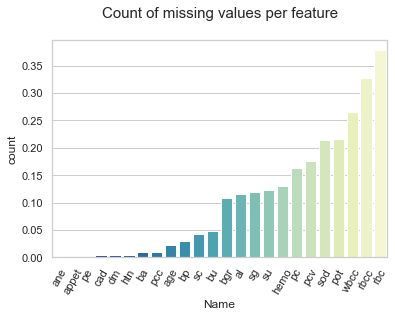

In [18]:
#Barplot of the missing 
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss, palette='YlGnBu_r') #_r to reverse the shade so to make it more visible
plt.xticks(rotation = 60)
plt.title('Count of missing values per feature\n', size=15)
plt.savefig('barplotNA.png', dpi=100,bbox_inches='tight')
plt.show() 
#the maximum value of missing values is for rbc (Red Blood Cells) 
#where 35% is null 

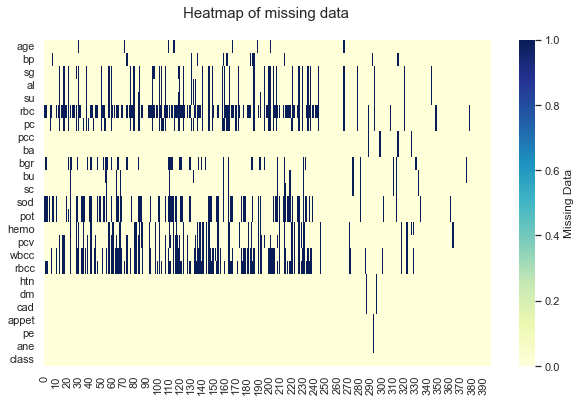

In [19]:
#heatmap of the missing data 
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap of missing data \n', size=15)
plt.savefig('heatmapNA.png', dpi=100,bbox_inches='tight')
plt.show()


#maybe they started to record some of the data (on the left) 
#after a while 
#(if we assume data has been collected chronologically from 0 to the last
#patient maybe at the beginning they weren't recording characteristics 
#such as rbc, sod, pot and all those on the left)

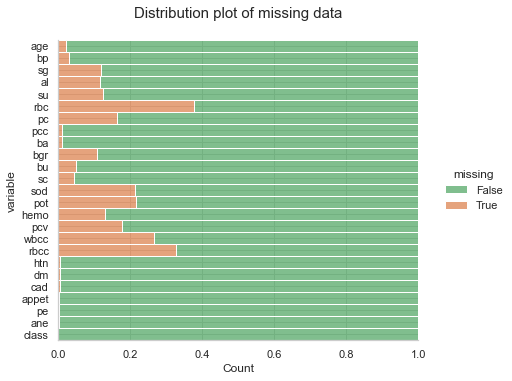

In [20]:
#Distribution plot of missing data 
#plt.figure(figsize=(15,10))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill", #dodge makes more confusion
    aspect=1.25,
    palette= ["C2", "C1"]
)
plt.title('Distribution plot of missing data\n', size=15)

plt.savefig('displotNA.png', dpi=100,bbox_inches='tight')
plt.show()


In [21]:
#ANAYSIS MISSING VALUES FOR CLASS (DISEASE vs NOT DISEASE)
#to understand if there is any difference in the presence of missing
#values depending on the class

#barplot of the missing for different classes 

#divide the dataset
ckd = data[data['class']=='ckd']
notckd = data[data['class']=='notckd']

In [22]:
#create the dataframes with the two informations 

nckd = notckd.isnull().sum()/len(notckd)  #missing for those without kidney disease
nckd = nckd.to_frame()
nckd.columns = ['not_ckd']

miss_per_dis = ckd.isnull().sum()/len(ckd) #missing for those with kidney disease
miss_per_dis = miss_per_dis.to_frame()
miss_per_dis.columns = ['ckd']

miss_per_dis['not_ckd'] = nckd['not_ckd'] #merge the two (no sorting so same rows)

miss_per_dis['variable'] = miss_per_dis.index #needed for the seaborn plot

miss_per_dis #dataframe with the info

,ckd,not_ckd,variable
age,0.032258,0.006711,age
bp,0.040323,0.013423,bp
sg,0.169355,0.033557,sg
al,0.165323,0.033557,al
su,0.177419,0.033557,su
rbc,0.568548,0.060403,rbc
pc,0.225806,0.060403,pc
pcc,0.000000,0.026846,pcc
ba,0.000000,0.026846,ba
bgr,0.149194,0.040268,bgr


In [23]:
#to represent it with seaborn need to melt down columns so that they can be treated as hue in plotting
melted = miss_per_dis.melt('variable', var_name='outcome',value_name='missing')
melted

,variable,outcome,missing
0,age,ckd,0.032258
1,bp,ckd,0.040323
2,sg,ckd,0.169355
3,al,ckd,0.165323
4,su,ckd,0.177419
5,rbc,ckd,0.568548
6,pc,ckd,0.225806
7,pcc,ckd,0.000000
8,ba,ckd,0.000000
9,bgr,ckd,0.149194


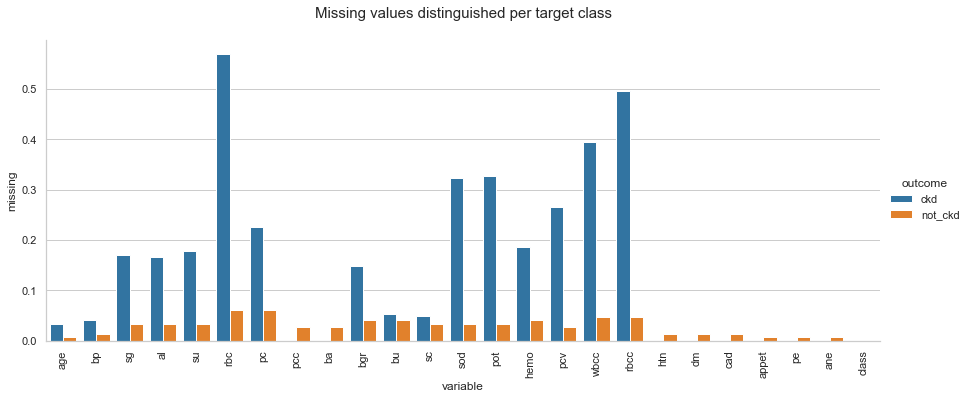

In [24]:
sns.set(style="whitegrid")
sns.catplot(x = 'variable', y='missing', hue = 'outcome',data=melted, kind='bar', palette = 'tab10',aspect=2.5)
plt.xticks(rotation = 90)
plt.title('Missing values distinguished per target class\n',size=15)
plt.savefig('NAclass.png', dpi=100,bbox_inches='tight')
plt.show() 

In [25]:
#we see  

#overall generally fewer missing values for those without the chronic disease
# in the absence of chronic disease the number of missing values is fewer but more spreaded 
#meaning that all the features have some missing values 

#whereas for those with the kidney disease 
#not all features have missing values 
#(for all patients affected with chronic kidney disease anemia,appet, cas, pe,etc have been record)- blue on the right
#but when that feature has missing values the number is generally higher 

#this tells us that features such as red blood cells count (rbc),rbcc, wbcc,sod,pot,pc 
#are not very significant to detect chronic kidney disease
#and particular attention should be made when dealing with such missing values

### 2.2.2 Handling of missing values ( & attribution of correct datatype)

In [26]:
# quindi fatta un'idea dei NaN 
# capisco come gestirli 

# https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

# prima avevo '?' poi NaN quindi non riesco a dividere categoriche e non 
# quindi posso adottare un approccio generale e intanto valuto come si distribuiscono i NaN tra le variabili 
# depending on the number of features for which it has the '?'
# if more than 12 (half of the available features) features are '?' then we can reasonably drop the record

#### Deleting the features for which more than half of the records have missing values

In [27]:
#There are no features for which more than half of the records have a missing value 
#(as seen before maximum is 35%)
#so we can keep all features -> good, don't suffer of loss of information

#### Deleting the records that do not have many features

In [28]:
# Count total NaN at each row in a DataFrame and identify the records where this is greater than 10 
# reasonable since it's 24 features 

rows = []

for i in range(len(data.index)):
    rows.append([i+1, data.iloc[i].isnull().sum()])

mpr = pd.DataFrame(rows, columns = ['row', 'missing']) #mpr=missing per row
many_missing = mpr[mpr['missing']>=10]

many_missing #records I want to drop because too many missing features 
             #-> reasonable to do since the percentage of missing values is not excessive 
             #in comparison with the complete dataset
             #(it's only 11 records (out of 397))

,row,missing
23,24,10
30,31,10
59,60,11
84,85,11
102,103,11
107,108,10
146,147,11
163,164,11
213,214,10
220,221,11


In [29]:
rows_to_drop = [many_missing.index[i] for i in range(len(many_missing))] #list of the dataframe

data.drop(rows_to_drop, inplace=True)

#data.shape -> to check

#### Imputation of missing values

There is no rule of thumb to handle missing data that guarantees a robust model with good performance. 
There are several sophisticated techniques for the imputation of missing values to prevent the loss informaton while at the same time not bias the analysis and hence create a robust model (eg. imputation using Deep Learning Library Datawig or the prediction of missing values with scikitlearn which takes into account also the covariance between the missing value column and other columns). <br>
Since the purpose of this work is more on the visualization of the confusion matrix (than the processing), here the imputation is performed in a more straightforward way. 
In particular, missing values are substituted with: 
- the **most frequent** value in the case of *categorical* variables 
- the **mean** or the **median** depending on the distribution (ie. skewed -> median, non skewed -> mean) in the case of *numerical* variables 

In [30]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


##### a) Numerical variables 

In [31]:
#can't plot the distribution rightaway because of the issue
#of reading everything as object 
#(since there were '?' then substituted with NANs)
#so I make a copy of the dataset without missing to see the distributions
#and decide with which value I should substitute the missing 
#(i.e. median or mean)


#copy the dataset
dt = data.copy()

#select only numerical variables 
num_feat = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
dt = dt[num_feat]

#force the numerical type 

for f in dt.columns: 
    dt[f] = dt[f].astype('float')   #non posso farlo con il ciclo for perchè ci sono \t e errori sparsi
                                    #quindi processo feature per feature <- FIXED (c'erano '\t?' ma poi ho sistemato)

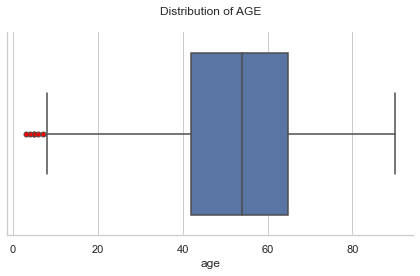

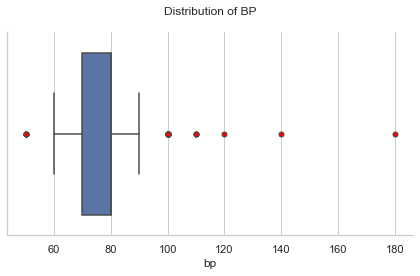

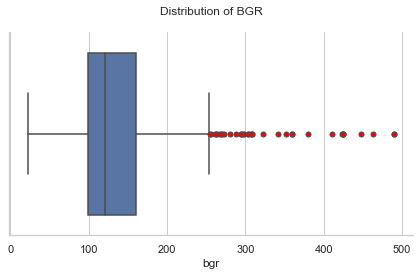

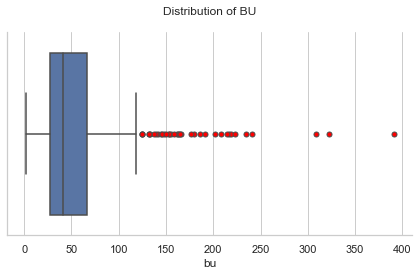

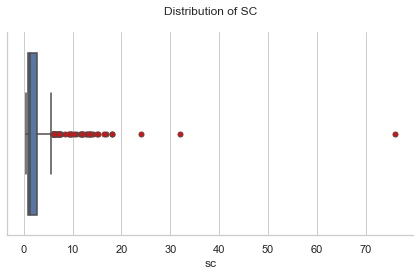

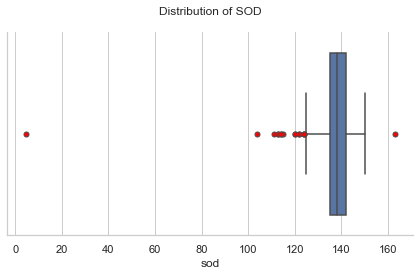

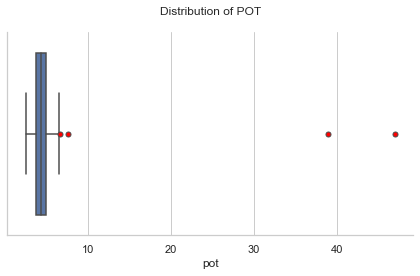

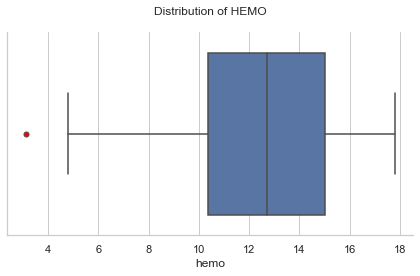

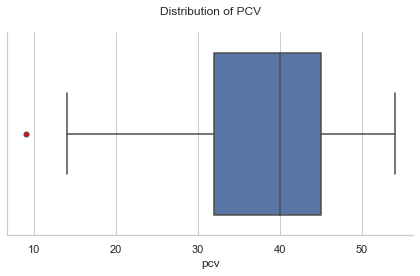

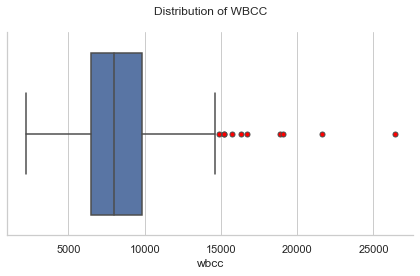

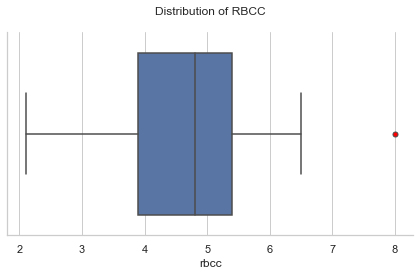

In [32]:
#Boxplots 
fig, ax = plt.subplots()
plt.title('Analysis of the boxplots - broken down per feature \n', fontsize=22 )

red_circle = dict(markerfacecolor='red',marker='o')

for col in dt.columns:
    sns.boxplot(x=dt[col], flierprops=red_circle) #flierprops per il layout degli outlier
    sns.despine()
    plt.title("Distribution of "+ col.upper() +'\n')
    plt.tight_layout()                                                      
    plt.savefig('Distribution_{}.png'.format(col), format="PNG") #to save each graph in the directory
    plt.show()
    

In [33]:
#There are several outliers but all reasonable 
#meaning that there are no clear errors  
#(no weird things such as negatives blood pressures or similar)

In [34]:
# all features (except those below) are relatively skewed so the missing values get substituted with the median
# AGE, RBCC, PCV and HEMO are less skewed so the missing values get substituted with the mean
ft_mean= ['age','rbcc','pcv','hemo']
mean_sub = dt[ft_mean]
mean_sub

,age,rbcc,pcv,hemo
0,48.0,5.2,44.0,15.4
1,7.0,NaN,38.0,11.3
2,62.0,NaN,31.0,9.6
3,48.0,3.9,32.0,11.2
4,51.0,4.6,35.0,11.6
...,...,...,...,...
392,55.0,4.9,47.0,15.7
393,42.0,6.2,54.0,16.5
394,12.0,5.4,49.0,15.8
395,17.0,5.9,51.0,14.2


In [35]:
ft_median = [el for el in list(dt.columns) if el not in ft_mean]
median_sub = dt[ft_median]
median_sub

,bp,bgr,bu,sc,sod,pot,wbcc
0,80.0,121.0,36.0,1.2,NaN,NaN,7800.0
1,50.0,NaN,18.0,0.8,NaN,NaN,6000.0
2,80.0,423.0,53.0,1.8,NaN,NaN,7500.0
3,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,80.0,106.0,26.0,1.4,NaN,NaN,7300.0
...,...,...,...,...,...,...,...
392,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


In [36]:
for col in median_sub.columns:
    median_sub[col].fillna(median_sub[col].median(), inplace=True)
    
median_sub 

#just warnings, no need to panic

/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_5419/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sub[col].fillna(median_sub[col].median(), inplace=True)
/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_5419/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sub[col].fillna(median_sub[col].median(), inplace=True)
/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_5419/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,bp,bgr,bu,sc,sod,pot,wbcc
0,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...
392,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


In [37]:
for col in mean_sub.columns:
    mean_sub[col].fillna(mean_sub[col].mean(), inplace=True)
    
mean_sub 

/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_5419/1680870589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_sub[col].fillna(mean_sub[col].mean(), inplace=True)


,age,rbcc,pcv,hemo
0,48.0,5.200000,44.0,15.4
1,7.0,4.702247,38.0,11.3
2,62.0,4.702247,31.0,9.6
3,48.0,3.900000,32.0,11.2
4,51.0,4.600000,35.0,11.6
...,...,...,...,...
392,55.0,4.900000,47.0,15.7
393,42.0,6.200000,54.0,16.5
394,12.0,5.400000,49.0,15.8
395,17.0,5.900000,51.0,14.2


In [38]:
numerical = pd.concat([mean_sub, median_sub], axis=1)
numerical

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,48.0,5.200000,44.0,15.4,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,7.0,4.702247,38.0,11.3,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,62.0,4.702247,31.0,9.6,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,48.0,3.900000,32.0,11.2,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,51.0,4.600000,35.0,11.6,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,4.900000,47.0,15.7,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,42.0,6.200000,54.0,16.5,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,12.0,5.400000,49.0,15.8,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,17.0,5.900000,51.0,14.2,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


##### b) Categorical variables 

In [39]:
#select only categorical features 
#(Note: remember that I am doing this whole thing because it reads 
#everything as object since there are Nan and '?' 
#and cannot set it in the read)

cat_feat = list(set(data.columns) - set(num_feat))
categorical = data[cat_feat]
categorical

,al,ane,pcc,rbc,pc,class,htn,dm,appet,pe,su,ba,cad,sg
0,1,no,notpresent,NaN,normal,ckd,yes,yes,good,no,0,notpresent,no,1.020
1,4,no,notpresent,NaN,normal,ckd,no,no,good,no,0,notpresent,no,1.020
2,2,yes,notpresent,normal,normal,ckd,no,yes,poor,no,3,notpresent,no,1.010
3,4,yes,present,normal,abnormal,ckd,yes,no,poor,yes,0,notpresent,no,1.005
4,2,no,notpresent,normal,normal,ckd,no,no,good,no,0,notpresent,no,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.020
393,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.025
394,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.020
395,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.025


In [40]:
#substitute with most frequent value 
categorical = categorical.fillna(categorical.mode().iloc[0]) 
categorical

,al,ane,pcc,rbc,pc,class,htn,dm,appet,pe,su,ba,cad,sg
0,1,no,notpresent,normal,normal,ckd,yes,yes,good,no,0,notpresent,no,1.020
1,4,no,notpresent,normal,normal,ckd,no,no,good,no,0,notpresent,no,1.020
2,2,yes,notpresent,normal,normal,ckd,no,yes,poor,no,3,notpresent,no,1.010
3,4,yes,present,normal,abnormal,ckd,yes,no,poor,yes,0,notpresent,no,1.005
4,2,no,notpresent,normal,normal,ckd,no,no,good,no,0,notpresent,no,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.020
393,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.025
394,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.020
395,0,no,notpresent,normal,normal,notckd,no,no,good,no,0,notpresent,no,1.025


In [41]:
#while doing the encoding of categorical variables some '\t' 
#have emerged so I fix them here 

print("The dm feature has the following categorical values", categorical['dm'].unique())

categorical['dm'].replace({'\tno':'no','\tyes':'yes'},inplace= True)


print("The dm feature has the following categorical values", categorical['dm'].unique())

The dm feature has the following categorical values ['yes' 'no' '\tno' '\tyes']
The dm feature has the following categorical values ['yes' 'no']


In [42]:
#and I separate the target variable from the categorical predictors 
target = 'class'
Y = categorical[target]
categorical.drop('class', inplace=True, axis=1)

In [43]:
categorical

,al,ane,pcc,rbc,pc,htn,dm,appet,pe,su,ba,cad,sg
0,1,no,notpresent,normal,normal,yes,yes,good,no,0,notpresent,no,1.020
1,4,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.020
2,2,yes,notpresent,normal,normal,no,yes,poor,no,3,notpresent,no,1.010
3,4,yes,present,normal,abnormal,yes,no,poor,yes,0,notpresent,no,1.005
4,2,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.020
393,0,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.025
394,0,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.020
395,0,no,notpresent,normal,normal,no,no,good,no,0,notpresent,no,1.025


## 2.3 Exploration of the cleaned dataset

### Grouped bar chart - categorical features vs target variable

In [44]:
bar_chart_data = categorical.copy()
bar_chart_data['class'] = data['class']

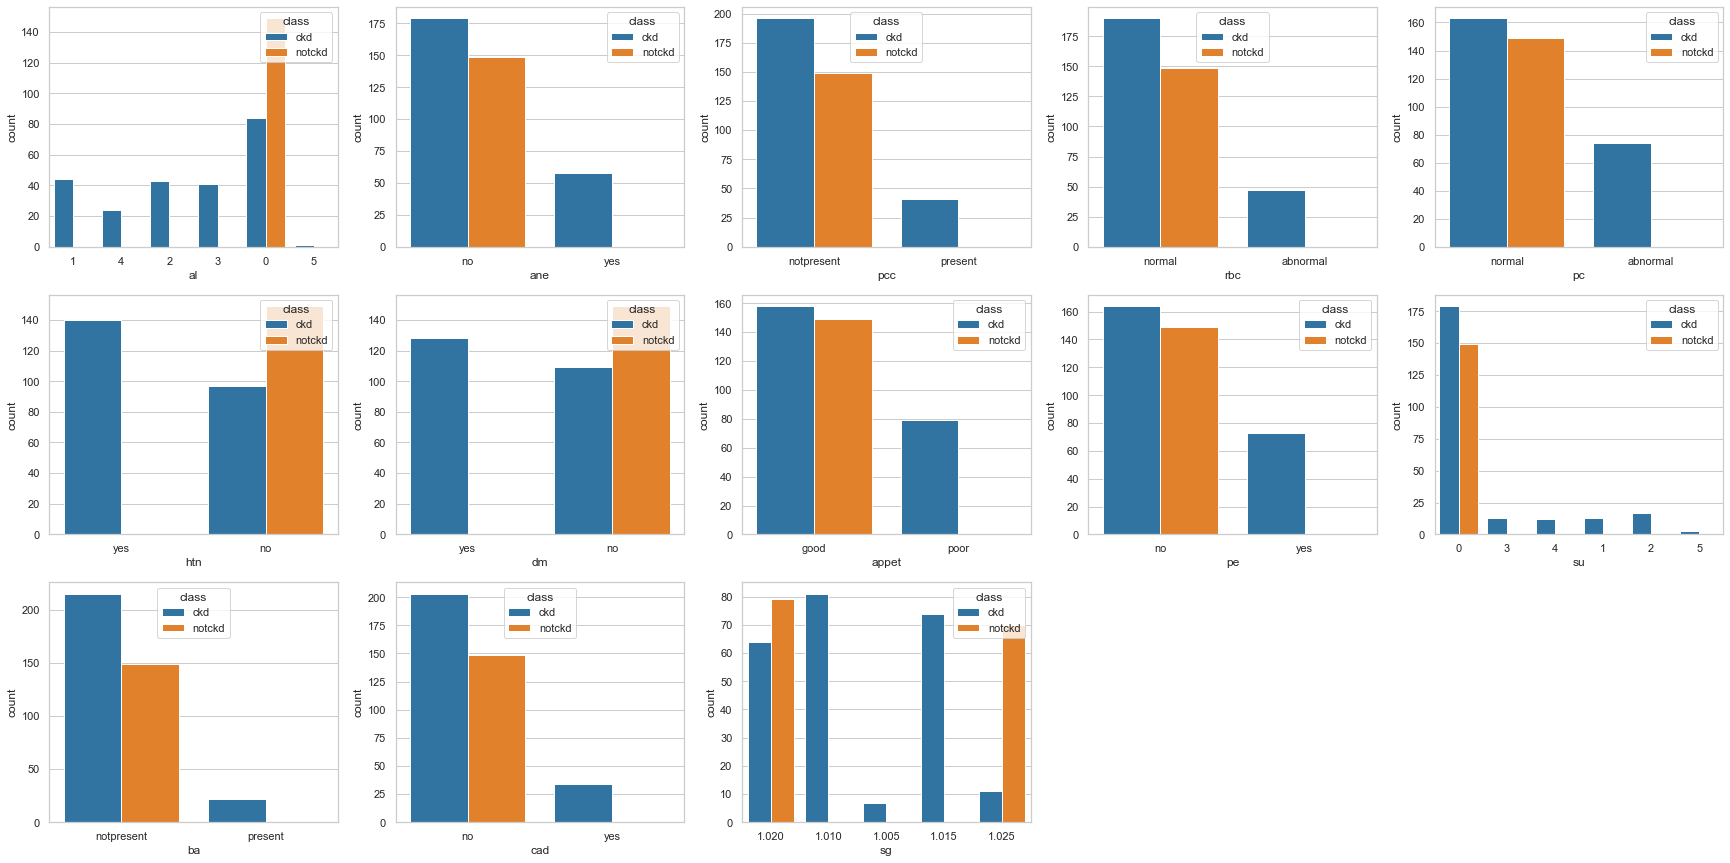

In [45]:
fig = plt.figure(figsize=(30,15))

cfeatures = list(categorical.columns) #not the class

for i in range(len(cfeatures)):
    column= cfeatures[i]
    sub = fig.add_subplot(3,5,i+1)
    chart = sns.countplot(data=bar_chart_data, x=column, hue='class', palette = 'tab10') #alt: RdYlBu, ma così è più unifrome
    
plt.savefig('gbc_cat',dpi=100,bbox_inches='tight')

Grouped bar chart is a straightforward representation to show how each categorical value weigh in determining the class. For example, patients with and without hypertension have distinctly distribution of target value, which indicates it is likely to contribute more to the prediction of the target. Similarly,there is a different distribution of the disease according to the presence or absence of Coronary Artery Disease (cad), in the dataset there are no patients with the coronary disease that do not have the chronic kidney disease. 
<br>
Overall, all the displayed categorical features appears to have different distribution of the class according to the categorical value so I expect all features to be relevant in predicting the class. 

### Boxplot - numerical features vs target variable 

In [46]:
bpt_data = numerical.copy()
bpt_data['class'] = data['class']
bpt_data

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc,class
0,48.0,5.200000,44.0,15.4,80.0,121.0,36.0,1.2,138.0,4.4,7800.0,ckd
1,7.0,4.702247,38.0,11.3,50.0,121.0,18.0,0.8,138.0,4.4,6000.0,ckd
2,62.0,4.702247,31.0,9.6,80.0,423.0,53.0,1.8,138.0,4.4,7500.0,ckd
3,48.0,3.900000,32.0,11.2,70.0,117.0,56.0,3.8,111.0,2.5,6700.0,ckd
4,51.0,4.600000,35.0,11.6,80.0,106.0,26.0,1.4,138.0,4.4,7300.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,4.900000,47.0,15.7,80.0,140.0,49.0,0.5,150.0,4.9,6700.0,notckd
393,42.0,6.200000,54.0,16.5,70.0,75.0,31.0,1.2,141.0,3.5,7800.0,notckd
394,12.0,5.400000,49.0,15.8,80.0,100.0,26.0,0.6,137.0,4.4,6600.0,notckd
395,17.0,5.900000,51.0,14.2,60.0,114.0,50.0,1.0,135.0,4.9,7200.0,notckd


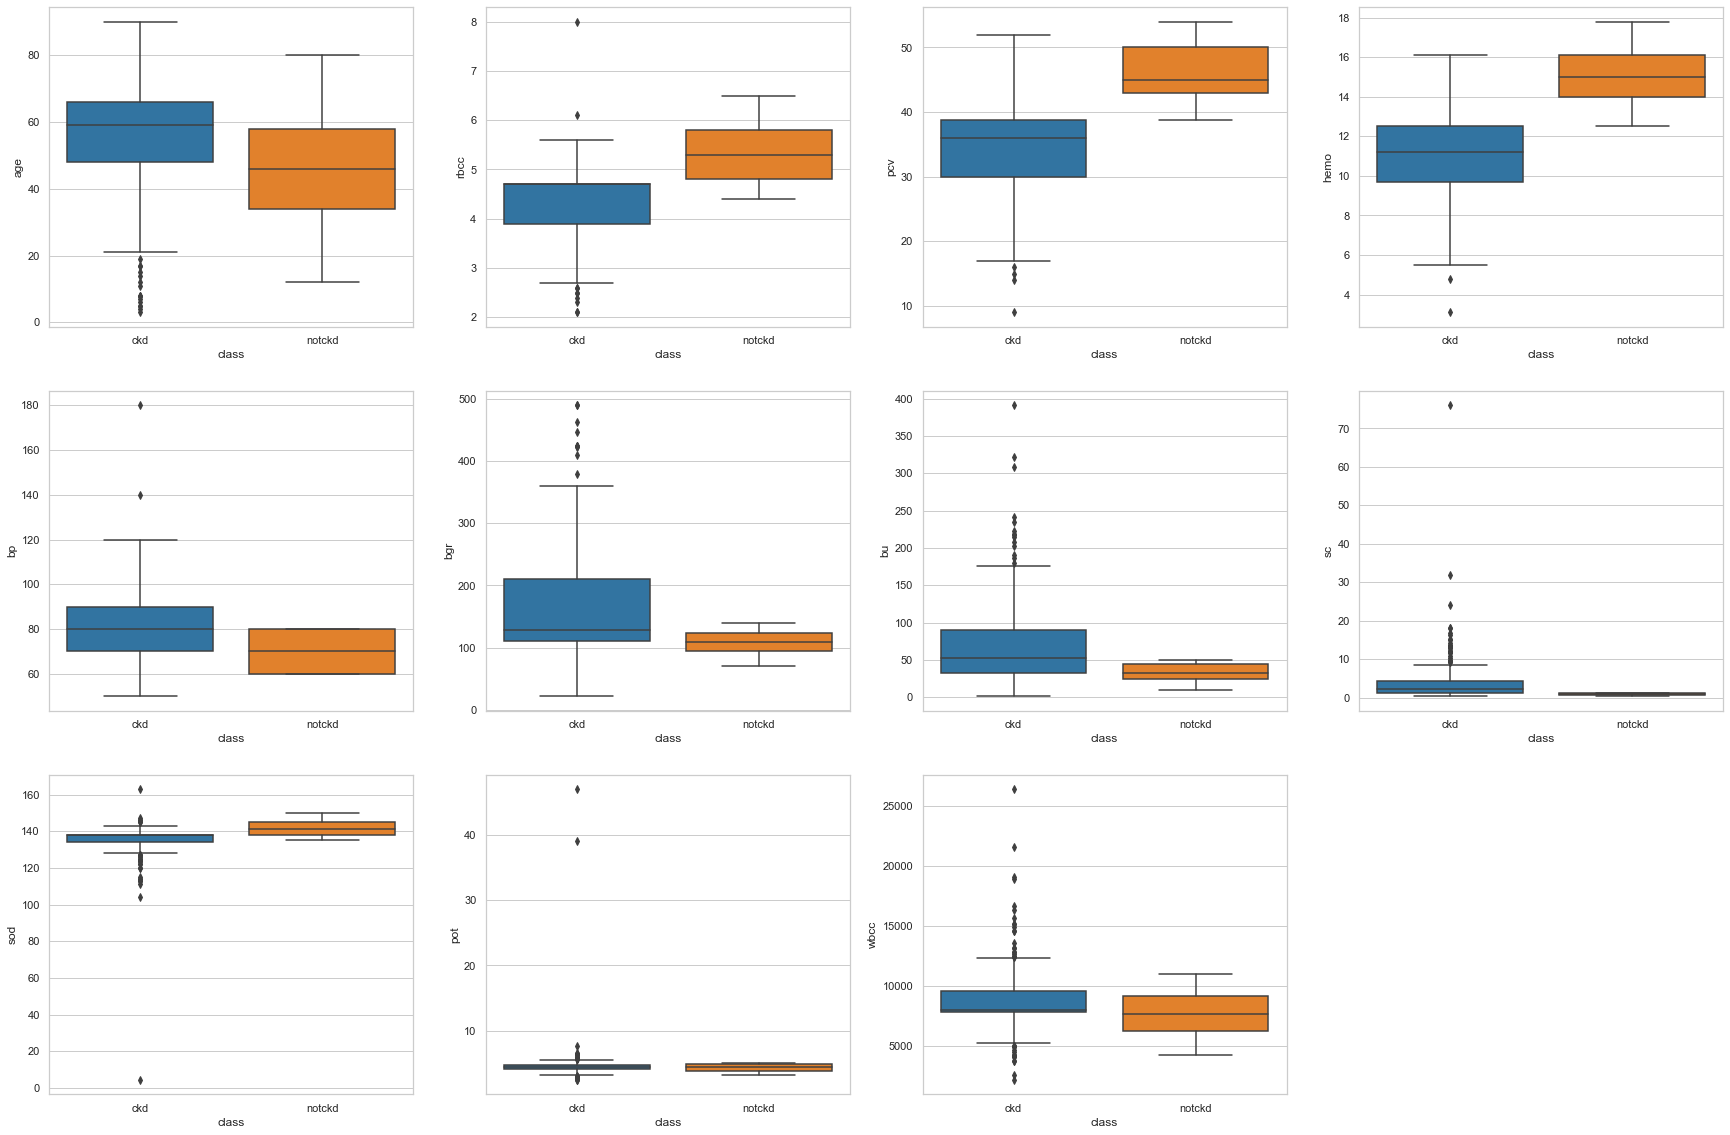

In [47]:
nfeatures = list(numerical.columns)
fig = plt.figure(figsize=(30,20))

for i in range(len(nfeatures)):
    column = nfeatures[i]
    sub= fig.add_subplot(3,4, i +1)
    sns.boxplot(x='class', y=column, data=bpt_data, palette='tab10')

plt.savefig('boxplot_class.png', dpi=100,bbox_inches='tight')

The boxplot shows how the values of the numerical features vary depending on the class (presence or absence of the kidney disease). For example, Blood Glucose Random (bgr) has a clear difference when the patient is affected by the chronic kidney disease (for those without the disease the blood glucose random tends to be around the same value, whereas for those with the disease there is a greater range of values) so I expect this features to play a greater role in the prediction of the class. This is true also for other features such as age, rbcc and all those with a different distribution. <br> 

## 2.4 Feature engineering (normalization of numerical predictors, encoding of categorical predictors) and merging of the final dataset

### 2.4.1. Normalization

In [48]:
#the features have different range so I proceed with
#Normalization 
#(=rescaling by the minimum and range of the vector 
#to make all the elements lie between 0 and 1 
#bringing all data to a common scale)

In [49]:
numerical

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,48.0,5.200000,44.0,15.4,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,7.0,4.702247,38.0,11.3,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,62.0,4.702247,31.0,9.6,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,48.0,3.900000,32.0,11.2,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,51.0,4.600000,35.0,11.6,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,4.900000,47.0,15.7,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,42.0,6.200000,54.0,16.5,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,12.0,5.400000,49.0,15.8,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,17.0,5.900000,51.0,14.2,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


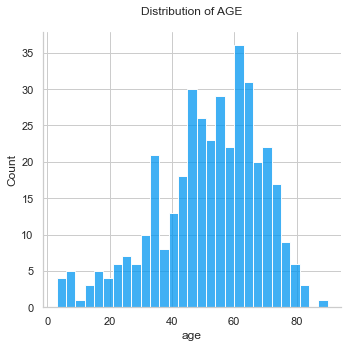

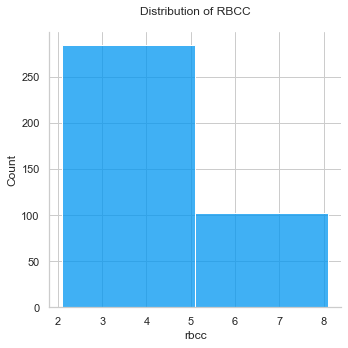

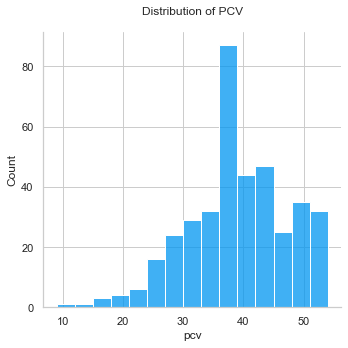

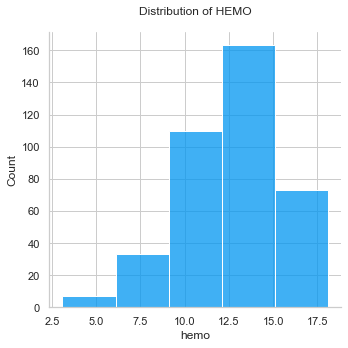

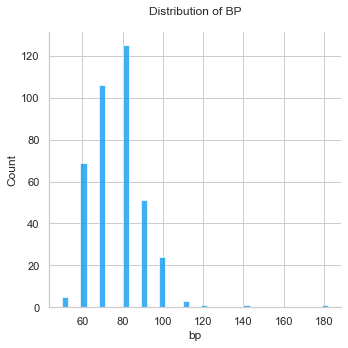

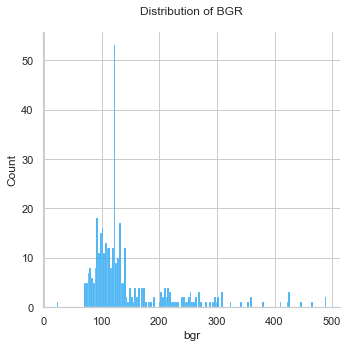

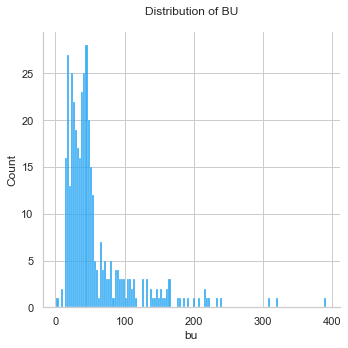

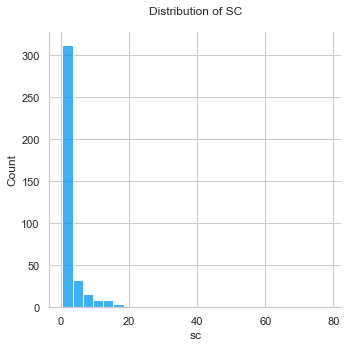

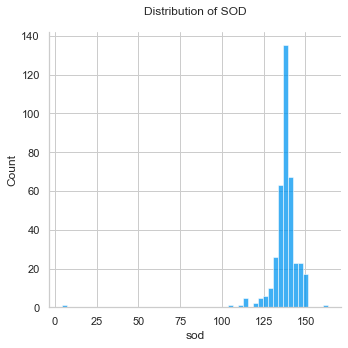

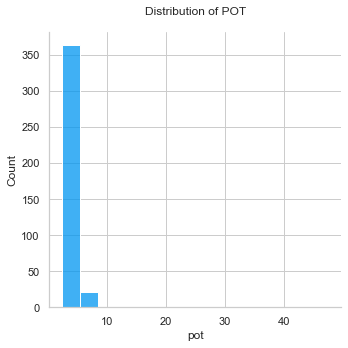

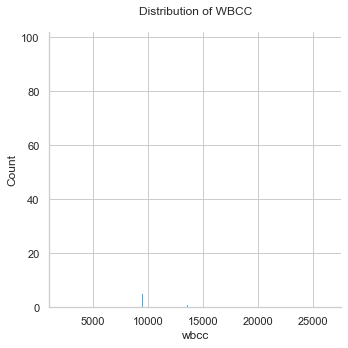

In [50]:
#fig, ax = plt.subplots()

for col in numerical.columns:
    sns.displot(x=numerical[col], binwidth=3, bins=10, color='#0096f1') 
    sns.despine()
    plt.title("Distribution of "+ col.upper() +'\n')
    plt.tight_layout()                                                      
    plt.savefig('{}.png'.format(col), format="PNG") #to save each graph in the directory
    plt.show()

In [51]:
#varying scale and distribution is not gaussian so we normalize 
#(useful if the algorithm does not make assumptions about the distribution of the data
# such as KNN and artifical neural networks)

In [52]:
print("Before:")
numerical

Before:


,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,48.0,5.200000,44.0,15.4,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,7.0,4.702247,38.0,11.3,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,62.0,4.702247,31.0,9.6,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,48.0,3.900000,32.0,11.2,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,51.0,4.600000,35.0,11.6,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,4.900000,47.0,15.7,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,42.0,6.200000,54.0,16.5,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,12.0,5.400000,49.0,15.8,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,17.0,5.900000,51.0,14.2,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


In [53]:
numerical.iloc[:,0:-1] = numerical.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [54]:
print("After:")
numerical

After:


,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,-0.205954,0.583606,0.626585,1.043279,0.250168,-0.313799,-0.414139,-0.324225,0.040817,-0.064328,7800.0
1,-2.640637,0.000000,-0.099558,-0.452605,-1.961241,-0.313799,-0.775077,-0.400624,0.040817,-0.064328,6000.0
2,0.625402,0.000000,-0.946724,-1.072850,0.250168,3.719296,-0.073253,-0.209627,0.040817,-0.064328,7500.0
3,-0.205954,-0.940620,-0.825700,-0.489090,-0.486968,-0.367217,-0.013096,0.172368,-2.843192,-0.726016,6700.0
4,-0.027806,-0.119883,-0.462629,-0.343150,0.250168,-0.514118,-0.614660,-0.286026,0.040817,-0.064328,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,0.209724,0.231861,0.989656,1.152734,0.250168,-0.060061,-0.153461,-0.457924,1.322598,0.109800,6700.0
393,-0.562249,1.756087,1.836822,1.444614,-0.486968,-0.928112,-0.514399,-0.324225,0.361262,-0.377759,7800.0
394,-2.343724,0.818102,1.231703,1.189219,0.250168,-0.594246,-0.614660,-0.438824,-0.065998,-0.064328,6600.0
395,-2.046812,1.404343,1.473751,0.605459,-1.224104,-0.407281,-0.133409,-0.362425,-0.279629,0.109800,7200.0


### 2.4.2 Encoding

In [55]:
#need to convert each text category to numbers in order for the machine 
#to process them using mathematical equations.

#one hot encoding (= each category is represented by a binary vector)
#I use one hot encoding so to avoid the situation where I might end up confusing the model into thinking
#that a column has data with some kind of order or hierarchy when there is not 
#since the categorical data is nominal (even specific gravity and albumin)
#
#(non label encoding perchè con label encoding le categorie sono ranked alphabetically 
#quindi una categoria risulta migliore di un'altra
#e soprattutto con linear models and SVMs we could have problems)

#There may be problems when there is no ordinal relationship and allowing the representation 
#to lean on any such relationship might be damaging to learning to solve the problem.

#onehotencoding mi aumenterà molto le colonne ma rimane comunque meno del numero di records

In [56]:
#con SKLEARN

#OneHotEncoder() vs pandas.get_dummies()
#https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
#-> OHE does the same things as get dummies but in addition, OHE saves the exploded categories into it’s object
#Saving exploded categories is extremely useful when I want to apply the same data pre-processing on my test set
#in quest'applicazione mi fa uguale quindi posso usare get_dummies()
#OneHotEncoder Features: 

#- encode categorical integer features using a one-hot aka one-of-K scheme
#- the input to this transformer should be a matrix of integers, denoting the values 
#  taken on by categorical (discrete) features
# -the output will be a sparse matrix where each column corresponds to one possible value of one feature
#- it is assumed that input features take on values in the range [0, n_values)
#- this encoding is needed for feeding categorical data to many scikit-learn estimators, 
#  notably linear models and SVMs with the standard kernels

#from sklearn.preprocessing import OneHotEncoder 
#ohe = OneHotEncoder()
#X = ohe.fit_transform(categorical).toarray()
#X
#pd.DataFrame(X)

#-> qui fatto con sklearn ma uso get_dummies() che by default fa one-hot encoding
#   e comunque non avrò categorie che appaiono nel test set e non nel train quindi dovrebbe andare bene  

In [57]:
categorical = pd.get_dummies(categorical)
categorical

,al_0,al_1,al_2,al_3,al_4,al_5,ane_no,ane_yes,pcc_notpresent,pcc_present,...,su_5,ba_notpresent,ba_present,cad_no,cad_yes,sg_1.005,sg_1.010,sg_1.015,sg_1.020,sg_1.025
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
393,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
394,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
395,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
categorical.shape 
#there are more columns due to the encoding
#but I still do not encounter issues of high dimensionality 
#(39 colonne vs 386 records so no issues in the transposing 
#of the matrix because I still have more records than columns)

(386, 37)

In [59]:
numerical

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,-0.205954,0.583606,0.626585,1.043279,0.250168,-0.313799,-0.414139,-0.324225,0.040817,-0.064328,7800.0
1,-2.640637,0.000000,-0.099558,-0.452605,-1.961241,-0.313799,-0.775077,-0.400624,0.040817,-0.064328,6000.0
2,0.625402,0.000000,-0.946724,-1.072850,0.250168,3.719296,-0.073253,-0.209627,0.040817,-0.064328,7500.0
3,-0.205954,-0.940620,-0.825700,-0.489090,-0.486968,-0.367217,-0.013096,0.172368,-2.843192,-0.726016,6700.0
4,-0.027806,-0.119883,-0.462629,-0.343150,0.250168,-0.514118,-0.614660,-0.286026,0.040817,-0.064328,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,0.209724,0.231861,0.989656,1.152734,0.250168,-0.060061,-0.153461,-0.457924,1.322598,0.109800,6700.0
393,-0.562249,1.756087,1.836822,1.444614,-0.486968,-0.928112,-0.514399,-0.324225,0.361262,-0.377759,7800.0
394,-2.343724,0.818102,1.231703,1.189219,0.250168,-0.594246,-0.614660,-0.438824,-0.065998,-0.064328,6600.0
395,-2.046812,1.404343,1.473751,0.605459,-1.224104,-0.407281,-0.133409,-0.362425,-0.279629,0.109800,7200.0


In [60]:
numerical.shape

(386, 11)

### 2.4.3 Feature selection

In [61]:
#using sklearn 

#I have a manageable number of features so no need to remove them 
#the only issue could be with multicollinearity
#multicollinearity but should not be too much of an issue in ML predictions
#https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc
#https://stats.stackexchange.com/questions/168622/why-is-multicollinearity-not-checked-in-modern-statistics-machine-learning/168631#168631

#however just to be sure I check also the VIF 
#(measures the ratio between the variance for a given regression coefficient
#with only that variable int he model versus the variance for a given 
#regression coefficient with all variables in the model) 

In [62]:
#!pip install statsmodels

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif_data = pd.DataFrame()
vif_data["feature"] = numerical.columns
vif_data["VIF"] = [round(variance_inflation_factor(numerical.values, i),3) for i in range(len(numerical.columns))]

In [65]:
vif_data
#VIF =1 (minimum possible) means the tested predictor is not correlated with the others
#the higher the VIF 
#The more correlated a predictor is with the other predictors
#- the more the standard error is inflated
#- the larger the confidence interval
#- the less likely it is that a coefficient will be evaluated as statistically significant

,feature,VIF
0,age,1.118
1,rbcc,2.139
2,pcv,4.433
3,hemo,4.292
4,bp,1.127
5,bgr,1.155
6,bu,2.535
7,sc,3.356
8,sod,2.338
9,pot,1.232


In [66]:
#so even if multicollinearity was an issue
#this is not the case 

### 2.4.4. Merging of the final dataset and balance check

In [67]:
#categorical e numerical features 
finalDT = pd.concat([numerical, categorical], axis=1)
finalDT

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,...,su_5,ba_notpresent,ba_present,cad_no,cad_yes,sg_1.005,sg_1.010,sg_1.015,sg_1.020,sg_1.025
0,-0.205954,0.583606,0.626585,1.043279,0.250168,-0.313799,-0.414139,-0.324225,0.040817,-0.064328,...,0,1,0,1,0,0,0,0,1,0
1,-2.640637,0.000000,-0.099558,-0.452605,-1.961241,-0.313799,-0.775077,-0.400624,0.040817,-0.064328,...,0,1,0,1,0,0,0,0,1,0
2,0.625402,0.000000,-0.946724,-1.072850,0.250168,3.719296,-0.073253,-0.209627,0.040817,-0.064328,...,0,1,0,1,0,0,1,0,0,0
3,-0.205954,-0.940620,-0.825700,-0.489090,-0.486968,-0.367217,-0.013096,0.172368,-2.843192,-0.726016,...,0,1,0,1,0,1,0,0,0,0
4,-0.027806,-0.119883,-0.462629,-0.343150,0.250168,-0.514118,-0.614660,-0.286026,0.040817,-0.064328,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.209724,0.231861,0.989656,1.152734,0.250168,-0.060061,-0.153461,-0.457924,1.322598,0.109800,...,0,1,0,1,0,0,0,0,1,0
393,-0.562249,1.756087,1.836822,1.444614,-0.486968,-0.928112,-0.514399,-0.324225,0.361262,-0.377759,...,0,1,0,1,0,0,0,0,0,1
394,-2.343724,0.818102,1.231703,1.189219,0.250168,-0.594246,-0.614660,-0.438824,-0.065998,-0.064328,...,0,1,0,1,0,0,0,0,1,0
395,-2.046812,1.404343,1.473751,0.605459,-1.224104,-0.407281,-0.133409,-0.362425,-0.279629,0.109800,...,0,1,0,1,0,0,0,0,0,1


In [68]:
#target variable
Y
Y.replace({"ckd": 1, "notckd": 0}, inplace=True)

In [69]:
#final dataset
finalDT = pd.concat([finalDT,Y], axis=1)
finalDT

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,cad_no,cad_yes,sg_1.005,sg_1.010,sg_1.015,sg_1.020,sg_1.025,class
0,-0.205954,0.583606,0.626585,1.043279,0.250168,-0.313799,-0.414139,-0.324225,0.040817,-0.064328,...,1,0,1,0,0,0,0,1,0,1
1,-2.640637,0.000000,-0.099558,-0.452605,-1.961241,-0.313799,-0.775077,-0.400624,0.040817,-0.064328,...,1,0,1,0,0,0,0,1,0,1
2,0.625402,0.000000,-0.946724,-1.072850,0.250168,3.719296,-0.073253,-0.209627,0.040817,-0.064328,...,1,0,1,0,0,1,0,0,0,1
3,-0.205954,-0.940620,-0.825700,-0.489090,-0.486968,-0.367217,-0.013096,0.172368,-2.843192,-0.726016,...,1,0,1,0,1,0,0,0,0,1
4,-0.027806,-0.119883,-0.462629,-0.343150,0.250168,-0.514118,-0.614660,-0.286026,0.040817,-0.064328,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.209724,0.231861,0.989656,1.152734,0.250168,-0.060061,-0.153461,-0.457924,1.322598,0.109800,...,1,0,1,0,0,0,0,1,0,0
393,-0.562249,1.756087,1.836822,1.444614,-0.486968,-0.928112,-0.514399,-0.324225,0.361262,-0.377759,...,1,0,1,0,0,0,0,0,1,0
394,-2.343724,0.818102,1.231703,1.189219,0.250168,-0.594246,-0.614660,-0.438824,-0.065998,-0.064328,...,1,0,1,0,0,0,0,1,0,0
395,-2.046812,1.404343,1.473751,0.605459,-1.224104,-0.407281,-0.133409,-0.362425,-0.279629,0.109800,...,1,0,1,0,0,0,0,0,1,0


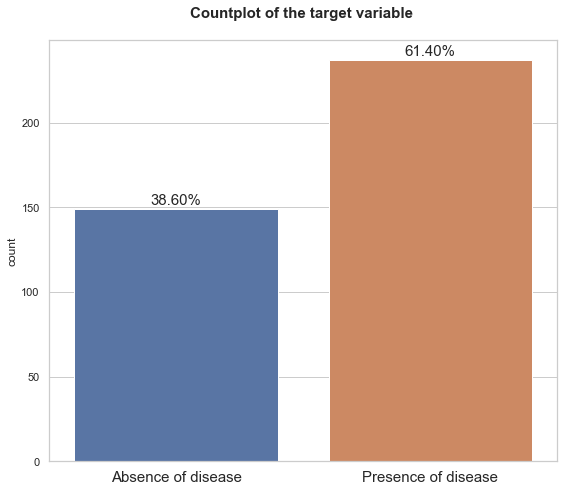

In [70]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x=finalDT["class"])  #palette=['chartreuse', 'darkviolet']
sns.set(style="whitegrid")
sns.set_palette('colorblind')
plt.title("Countplot of the target variable \n", fontsize=15, fontweight='bold') 
ax.set_xticklabels(['Absence of disease','Presence of disease'], fontsize=15)
ax.set_xlabel('')

#add percentage
total = float(len(finalDT))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 
    y = p.get_height()+5
    ax.annotate(percentage,(x, y), ha='center', va='center', size=15)

plt.tight_layout()
plt.savefig('balance', dpi=100)
plt.show()
#unbalanced towards the presence of the chronic kidney disease
#generally in medical datasets it's the opposite
#but still what I care about is that it's unbalanced
#(not really towards which class)
#to show the greater robustness of the metric and the evaluation

In [ ]:
#export the processed dataset
#finalDT.to_csv(r'data\cleaned.csv', index = False)